

# EDA on McDonald's Data



## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on Outlet metrics**](#section501)<br>
    - 5.1.1 [How many stores are actually owned and run by McDonald's?](#section50101)<br>
    - 5.1.2 [Which outlets generate maximum revenue for the company?](#section50102)<br>
    - 5.1.3 [Top 10 Outlets in terms of Profit](#section50103)<br>
    - 5.1.4 [Outlets with highest Number of Employees](#section50104)<br>
    - 5.1.5 [Where do you find the maximum footfall in McDonald's?](#section50105)<br><br>
  - 5.2 [**Analysis based on Nutritional Value**](#section502)<br>
      - 5.2.1 [Which is the most common category on menu?](#section50201)<br>
      - 5.2.2 [How many calories (energy) on an average are present in each category of McDonald's menu?](#section50202)<br>
      - 5.2.3 [Is there any difference in the nutritional value of a grilled vs crispy chicken?](#section50203)<br>
      - 5.2.4 [On an average, how much sugar consumption happens when you order Desserts, Beverages, Smoothies and Shakes?](#section50204)<br>
     
6. [Conclusion](#section6)
  - 6.1 [Actionable Insights](#section601)

<a id=section1></a>
## 1. Problem Statement

**McDonald's** is hip all over the world, including in India. However, the McDonald's menu is not universal. In **India**, there are some **menu items** that are similar, but others that are much **different from the U.S. menu**. Through **comparing the McDonald's menu in the U.S. and India**, we can see that fast food menus can truly **give us a perspective on cultural and economic similarities and differences throughout the world**. 



---

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio

Defaulting to user installation because normal site-packages is not writeable
  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)


In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

---

### Disclaimer: The images are only for illustration purpose. Please don't compare them with the data.

<a id=section3></a>
## 3. Loading Data

In this **Data Visualization** sheet we are using two datasets about **McDonald's**. 

<img src="https://raw.githubusercontent.com/insaid2018/Term-1/master/Images/mcdonalds_logo.jpg" width=750 height=750><br/>

- 1. **Nutrition Facts for McDonald's Menu** dataset: This dataset contains information about the **nutritional content** present in different items on **McDonald's Menu** for **India and US** stores.


- 2. **McDonald's Outlet's Information** dataset: This dataset contains information about various **McDonald's outlets** in **India and US**. 

### Importing 1st Dataset

# <a id=section301></a>
### Description of the Dataset

- This dataset provides a **nutrition analysis** of different menu items on the **McDonald's menu** in **India and US**, including breakfast, chicken wings, shake, snacks, hot beverages, cold beverages and desserts.


- Detailed information about each nutrient column can be found at this [link](https://www.fda.gov/food/nutrition-education-resources-materials/how-understand-and-use-nutrition-facts-label).


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Category                       | The category to which an item belong to.                                                   | 
| Item                           | Name of the item.                                                                          | 
| Serve_Size                     | The weight of a single serving (g).                                                        | 
| Energy                         | Number of calories in the item (kcal).                                                     |
| Protein                        | Protein in the item (g).                                                                   |
| Total_Fat                      | Total Fat in the item (g).                                                                 |
| Saturated_Fat                  | Saturated Fat in the item (g).                                                             |
| Trans_Fat                      | Trans Fat in the item (g).                                                                 |
| Cholestrol                     | Cholestrol in the item (mg).                                                               |
| Carbohydrates                  | Carbohydrates in the item (g).                                                             |
| Sugars                         | Sugars in the item (g).                                                                    |
| Dietary_Fibre                  | Dietary Fibres in the item (g).                                                            |
| Sodium                         | Sodium in the item (mg).                                                                   |


<img src="https://raw.githubusercontent.com/amity1415/DS/main/EKeeda/Images/EDA/Mcd_EDA1.png" width=750 height=750><br/>


In [6]:
pd_menu = pd.read_excel("D:\Training'\eKeeda\Rawdata\mcdonalds_menu.xlsx")
#D:\Training'\eKeeda\Rawdata
#df_menu=pd.read_excel('https://github.com/amity1415/DS/raw/main/EKeeda/Rawdata/mcdonalds_menu.xlsx')
pd_menu.head()

,Category,Item,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,Breakfast,Egg & Cheese Muﬃn,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,Breakfast,Sausage McMuﬀm,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,Breakfast,Sausage & Egg McMuﬀm,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,Breakfast,Veg McMuﬀm,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,Breakfast,Veg Supreme Muﬃn,139,299,7,13.0,5.2,0.2,11,39,4,4,960


In [7]:
pd_menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       340 non-null    object 
 1   Item           340 non-null    object 
 2   Serve_Size     340 non-null    object 
 3   Energy         340 non-null    int64  
 4   Protein        340 non-null    int64  
 5   Total_Fat      340 non-null    float64
 6   Saturated_Fat  340 non-null    float64
 7   Trans_Fat      340 non-null    float64
 8   Cholestrol     340 non-null    int64  
 9   Carbohydrates  340 non-null    int64  
 10  Sugars         340 non-null    int64  
 11  Dietary_Fibre  340 non-null    int64  
 12  Sodium         340 non-null    object 
dtypes: float64(3), int64(6), object(4)
memory usage: 34.7+ KB


- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **340 samples (rows)** and **13 columns** in the dataframe.
  
  - There are **9 columns** with a **numeric** datatype and **4 columns** with an **object** datatype.
  
  - There are **0 missing** values in the data.

### Importing 2nd Dataset

In [9]:
# Importing the 2nd dataset (McDonald's Store Information dataset).
df_store = pd.read_excel("D:\Training'\eKeeda\Rawdata\mcdonalds_outlets.xlsx")
#df_store = pd.read_excel('https://github.com/amity1415/DS/raw/main/EKeeda/Rawdata/mcdonalds_outlets.xlsx')
df_store.head()

,Brand,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Postcode,Phone_Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm
2,McDonald's,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm
3,McDonald's,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,500033,NaN,GMT+05:30 Asia/New_Delhi,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm
4,McDonald's,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,500084,NaN,GMT+05:30 Asia/New_Delhi,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn


### Description of the Dataset

- This dataset provides information different **McDonald's India outlets** like their Store ID, Address, City, State, Revenue, Profits, Number of Employees, Most Selling Item, etc.


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Brand                          | Brand name.                                                                                | 
| Store ID                       | ID of the store.                                                                           | 
| Store Name                     | Name of the store.                                                                         |
| Ownership Type                 | Ownership type of the store.                                                               |
| Street Address                 | Address of the store's location.                                                           |
| City                           | City of the store's location.                                                              |
| State                          | State of the store's location.                                                             |
| Country                        | Country of the store's location.                                                           |
| Postcode                       | Postcode of the store's location.                                                          |
| Phone Number                   | Phone number of the store.                                                                 |
| Timezone                       | Timezone of the store's location.                                                          |
| Longitude                      | Longitude of the store's location.                                                         |
| Latitude                       | Latitude of the store's location.                                                          |
| Revenue                        | Revenue of the store (in million Indian Rupees).                                           |
| Profits                        | Profits of the store (in million Indian Rupees).                                           |
| Selling Price                  | Total Selling Price of items of the store (in million Indian Rupees).                      |
| Cost Price                     | Total Cost Price of items of the store (in million Indian Rupees).                         |
| Gross Profit Margin            | Gross Profit Margin of the store (in million Indian Rupees).                               |
| Number of Employees            | Number of employees of the store.                                                          |
| Customers                      | Number of monthly customeres of the store.                                                 |
| Best Selling Item              | Most selling item of the store.                                                            |


<img src="https://raw.githubusercontent.com/amity1415/DS/main/EKeeda/Images/EDA/Mcd_EDA2.png" width=750 height=750><br/>


In [10]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                340 non-null    object 
 1   Store_ID             340 non-null    object 
 2   Store_Name           340 non-null    object 
 3   Ownership_Type       340 non-null    object 
 4   Street_Address       340 non-null    object 
 5   City                 340 non-null    object 
 6   State                340 non-null    object 
 7   Country              340 non-null    object 
 8   Postcode             340 non-null    int64  
 9   Phone_Number         248 non-null    object 
 10  Timezone             340 non-null    object 
 11  Longitude            340 non-null    float64
 12  Latitude             340 non-null    float64
 13  Revenue              340 non-null    float64
 14  Profits              340 non-null    float64
 15  Selling_Price        340 non-null    flo

- ```info``` function gives us the following insights into the df_store dataframe:

  - There are a total of **340 samples (rows)** and **21 columns** in the dataframe.
  
  - There are **10 columns** with a **numeric** datatype and **11 columns** with an **object** datatype.
  
  - There are **missing** values in the **Phone Number** column.

- We are going to perform a **merge** on the **two dataframes**, **df_store and df_menu** on the basis of **Best Selling Item** of **df_store** dataframe and **Item** column of **df_menu** dataframe to create a new dataframe **df_merge**, in order to make our **EDA** easier.

In [11]:
df_store['Best_Selling_Item'].nunique() # We see that all the best selling items of each store is unique.


340

In [12]:
df_merge = pd.merge(df_store, pd_menu, how='inner', left_on='Best_Selling_Item', right_on = 'Item').drop(['Item'],1)
df_merge.head()

,Brand,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Postcode,Phone_Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,McDonald's,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,McDonald's,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,500033,NaN,GMT+05:30 Asia/New_Delhi,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,McDonald's,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,500084,NaN,GMT+05:30 Asia/New_Delhi,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


In [13]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 339
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                340 non-null    object 
 1   Store_ID             340 non-null    object 
 2   Store_Name           340 non-null    object 
 3   Ownership_Type       340 non-null    object 
 4   Street_Address       340 non-null    object 
 5   City                 340 non-null    object 
 6   State                340 non-null    object 
 7   Country              340 non-null    object 
 8   Postcode             340 non-null    int64  
 9   Phone_Number         248 non-null    object 
 10  Timezone             340 non-null    object 
 11  Longitude            340 non-null    float64
 12  Latitude             340 non-null    float64
 13  Revenue              340 non-null    float64
 14  Profits              340 non-null    float64
 15  Selling_Price        340 non-null    flo

- ```info``` function gives us the following insights into the df_merge dataframe:

  - There are a total of **340 samples (rows)** and **33 columns** in the dataframe.
  
  - There are **19 columns** with a **numeric** datatype and **14 columns** with an **object** datatype.
  
  - There are **missing** values in the **Phone Number** column.

In [14]:
df_merge.describe().round(2) 

,Postcode,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre
count,3.400000e+02,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00,340.00
mean,2.902141e+08,-56.76,33.49,25.85,4.64,14.60,11.08,3.52,90.56,13071.99,337.80,11.69,13.05,5.60,0.18,47.54,43.77,26.35,1.54
std,3.649787e+08,76.97,9.95,14.48,3.41,9.47,6.20,5.19,31.35,6993.91,231.85,10.99,13.64,5.22,0.38,81.82,26.94,26.90,1.66
min,2.134000e+03,-158.02,12.91,1.00,0.05,0.85,0.43,-4.88,25.01,1002.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,9.043625e+04,-99.32,28.52,15.30,1.83,6.91,6.56,0.07,64.58,6877.50,176.50,2.00,1.38,0.50,0.00,4.00,28.00,4.00,0.00
50%,5.600790e+05,-87.26,35.10,27.06,3.89,13.71,11.60,1.43,89.16,13373.55,299.50,10.00,10.00,4.55,0.00,25.00,41.00,16.00,1.00
75%,6.604731e+08,-71.12,40.10,37.93,6.92,20.43,16.26,6.18,115.52,19245.19,460.00,17.00,20.00,9.00,0.10,55.00,56.00,43.25,3.00
max,9.966980e+08,80.26,61.60,49.68,13.51,40.28,21.29,19.46,149.09,24964.84,1880.00,87.00,118.00,24.10,2.50,575.00,141.00,128.00,9.00


- ```describe``` function gives us the following insights into the data:
  
  - **Revenue** column is having an almost **normal distribution** because the **mean (25.8534)** value is close to the **median (27.0561)** value.

  - The distribution of **Energy** is **positive (right) skewed** because the **mean** of **Energy (337.800)** lies to the **right** of the **median(50%)** value **(299.500)**, on a **distribution plot**. 
  
  - The **max** value of **Energy (1880.000)** is an **outlier** because it lie far away from the mean.
  
  - Similarly comparing the **75%** and **max** values of the other columns we can see that there are **outliers** present in some other columns.

---

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [15]:
# to install pandas profiling please run this command.
!pip install pandas-profiling --upgrade

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 324.4/324.4 kB 2.9 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
import pandas_profiling

In [17]:
#to output pandas profiling report to an external html file
#Saving the output as profiling_before_preprocessing.html

'''
profile = df_merge.profile_report(title='Pandas Profiling before Data Preprocessing')
profile.to_file(output_file='profiling_before_preprocessing.html')
'''

#To output the pandas profiling reprot on the notebook

profile = pandas_profiling.ProfileReport(df_merge)
profile.to_file(output_file="MCD_profiling_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 33
- Number of observations: 340
- Missing cells: 92 (0.8%)


__Variables types__: 
- Numeric = 16
- Categorical = 10
- Text (Unique) = 3
- Rejected = 4

<br>

- **Brand** has **constant value "McDonald's"**.


- **Phone_Number** has **92 (27.1%) missing values**.


- **Number_of_Employees** is **highly correlated** with **Cost_Price (ρ = 0.9091375321)**.


- **Revenue** is **highly correlated** with **Number_of_Employees (ρ = 0.9091375321)**.


- **Total_Fat** is **highly correlated** with **Energy (ρ = 0.9065)**.


- **City** has a **high cardinality (139 distinct values)**.


- **Phone_Number** has a **high cardinality (249 distinct values)**.


- **Serve_Size** has a **high cardinality (161 distinct values)**.


- **Street_Address** has a **high cardinality (339 distinct values)**.




- **Cholestrol** has a **skewness** of **3.8984** and **kurtosis** of **18.847**.

  - The distribution is **positive (right) skewed** as the **mean (47.544)** is to the **right** of the **median (25)**.
  
  - **95%** samples have a **Cholestrol** less than **250**.
  
  - The high value of **kurtosis** implies that the tail is heavy and there is a presence of outliers in the data (**maximum value = 575 is an outlier**).
  

- **Carbohydrates** has a **skewness** of **0.9975** and **kurtosis** of **1.8172**.

  - **Maximum value = 141** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(55)**.


- **Category** has data divided into **14** distinct values.
  
  - __Hot Beverages__ has the **highest** share with **99** samples **(29.1% share)** and then **Breakfast** has **49** samples **(14.4% share)**.
 			
  
- **Country** has data divided into **2** distinct values.
  
  - __US__ has **258** samples **(75.9% share)** and **IN** has **82** samples **(24.1% share)**.
  
 
- **Energy** has a **skewness** of **1.4793** and **kurtosis** of **5.7022**.

  - **Maximum value = 1880** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(460)**.
 

- **Ownership_Type** has data divided into **3** distinct categories.
  
  - __Company Owned__ has **137** samples **(40.3% share)**, **Licensed** has **121** samples **(35.6% share)**, and **Joint Venture** has **82** samples **(24.1% share)**.
  
  
- **Protein** has a **skewness** of **1.639** and **kurtosis** of **6.0817**.

  - **Maximum value = 87** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(17)**.
  
  
- All the **remaining columns** can be studied in the same way.

---

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, please run **Pandas Profiling** before running the code below.

In [18]:
df_merge.head()

,Brand,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Postcode,Phone_Number,Timezone,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,McDonald's,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,McDonald's,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,McDonald's,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,McDonald's,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,500033,NaN,GMT+05:30 Asia/New_Delhi,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,McDonald's,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,500084,NaN,GMT+05:30 Asia/New_Delhi,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


- Since the column **Brand** has a **constant value** for all the samples, we will drop this column.


- Also the columns **Postcode, Phone Number, and Timezone** will be **dropped** because they **don't provide** any additional **insights** into the data.

In [19]:
df_merge.drop(['Brand','Postcode','Phone_Number','Timezone'], axis= 1, inplace=True)

In [20]:
df_merge.head()

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.117344,0.171584,1.655165,0.907433,0.747732,34.311197,3979.583117,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.058504,0.054645,0.895944,0.453645,0.442299,25.487533,1156.010620,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.505020,0.663867,2.864311,1.930723,0.933588,54.208502,10346.720786,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.405530,0.397835,2.394072,1.459513,0.934559,45.046083,7414.746544,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.332713,1.656524,3.395053,3.142591,0.252461,77.772607,17887.234107,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


- **Rounding** the **values** of **Revenue, Profits, Sellling_Price, Cost_Price, Gross_Profit_Margin** columns to 3 decimal places.

In [21]:
df_merge = df_merge.round(decimals=2)
df_merge.head()

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.12,0.17,1.66,0.91,0.75,34.31,3979.58,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.06,0.05,0.90,0.45,0.44,25.49,1156.01,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.51,0.66,2.86,1.93,0.93,54.21,10346.72,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.41,0.40,2.39,1.46,0.93,45.05,7414.75,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.33,1.66,3.40,3.14,0.25,77.77,17887.23,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960


- The **Number of Employees** and **Customers** columns have values in **decimals**, which is not possible because **count of people** is an example of **natural number**.


- This looks like a **Data Entry error**, and we will modify the values to lie in the **set of natural numbers**.

In [22]:
# Using apply( np.floor) to get the floor of the values.

df_merge['Number_of_Employees'] = df_merge['Number_of_Employees'].apply(np.floor).astype(int)
df_merge['Customers'] = df_merge['Customers'].apply(np.floor).astype(int)
df_merge.head(10)

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Banjara Hills",Hyderabad,AP,IN,78.45,17.42,2.12,0.17,1.66,0.91,0.75,34,3979,Egg & Cheese Muﬃn,Breakfast,112,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,78.39,17.48,1.06,0.05,0.90,0.45,0.44,25,1156,Sausage McMuﬀm,Breakfast,112,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,78.39,17.43,4.51,0.66,2.86,1.93,0.93,54,10346,Sausage & Egg McMuﬀm,Breakfast,157,355,22,17.0,7.9,0.2,277,29,2,2,1020
3,23180-228545,Jubilee Hills,Joint Venture,"Ground Floor, Road No. 92, Near Apollo hospital, Jubilee Hills",Hyderabad,AP,IN,78.42,17.42,3.41,0.40,2.39,1.46,0.93,45,7414,Veg McMuﬀm,Breakfast,119,299,10,12.0,7.2,0.2,21,38,3,3,1000
4,24457-238129,Hi-Tech City,Joint Venture,"Upper Ground Floor, Phoenix tower A, Opposite Trident Hotel, Madhapur Village",Hyderabad,AP,IN,78.38,17.45,7.33,1.66,3.40,3.14,0.25,77,17887,Veg Supreme Muﬃn,Breakfast,139,299,7,13.0,5.2,0.2,11,39,4,4,960
5,23664-232349,Mindspace,Joint Venture,"Mindspace, Hitech City",Hyderabad,AP,IN,78.38,17.45,3.12,0.34,2.25,1.34,0.91,42,6652,Hot Cakes with Maple Syrup,Breakfast,142 g,372,6,10.0,6.4,0.4,16,64,2,2,630
6,20874-208485,Punjabi Bagh,Joint Venture,"1/83, Ground Floor , Club Road, West Punjabi Bagh",Delhi,DL,IN,77.13,28.67,5.20,0.87,3.08,2.23,0.86,59,12187,Hash Brown,Breakfast,64,166,2,10.0,4.8,0.1,1,16,2,2,370
7,29491-254065,T3 Domestic Arrivals,Joint Venture,IGI Airport,Delhi,DL,IN,77.12,28.57,7.73,1.83,3.39,3.31,0.08,81,18950,McEgg Burger,Breakfast,115,281,12,12.0,3.8,0.1,227,32,2,2,700
8,22446-221249,HUDA Metro Station,Joint Venture,"Ground Floor, South Wing, HUDA Metro Station",Gurgaon,DL,IN,77.07,28.46,2.11,0.17,1.65,0.91,0.75,34,3970,Chicken Maharaja Mac,Sandwiches and Wraps,246,545,26,26.0,8.9,0.2,64,52,7,5,1030
9,23392-229965,R K Puram,Joint Venture,"Sangam Courtyard, Major Somnath Marg, Sector 9, R.K Puram",New Delhi,DL,IN,77.17,28.57,4.65,0.71,2.92,1.99,0.92,55,10744,McChicken,Sandwiches and Wraps,173 g,431,15,20.0,6.0,0.2,31,49,5,3,840


- **Serve_Size** column has some **irregularities** present, let's fix them.  

In [23]:
# Checking the different types of values in the Serve_size column. Looking at every 4th value .
df_merge['Serve_Size'].unique()

array([112, 157, 119, 139, '142 g', 64, 115, 246, '173 g', '136 g', 130,
       '169 g', 146, 199, 272, '186 g', 260, 110, 156, '220 g', 87, 96,
       144, 90, 180, 9, 25, 14, 10, 200, 275, 402, 277, 400, '249 g', 344,
       494, 249, '344 g', 300, '500 g', 250, 237, 247, 81, 93, '97 g',
       '92 g', '132 g', 92, 132, 111, 155, 147, 94, 167, '200 g', 141,
       133, 121, '123 g', 136, 135, 161, 185, 150, 164, 153, 117, 131,
       163, 177, 181, 143, 201, 174, 178, 205, 197, 241, '269 g', 283,
       '286 g', 420, 434, '423 g', 437, 151, 192, '111 g', 114, 251,
       '211 g', 202, 227, 235, 244, 98, 113, 270, '190 g', 159, 208, 213,
       230, 217, '284 g', 160, 171, 148, 316, 302, 310, 297, 314, 318,
       304, 291, 65, 97, 162, 323, 646, 142, 223, 255, 348, 335, '130 g',
       123, 116, 128, '121 g', 75, 168, '38 g', 34, 149, 77, '33 g', 33,
       29, 179, 182, 453, 595, 850, 340, '453 g', 236, 170, 623, 479,
       '595 g', 566, '566 g', '340 g', 907, '907 g', '623 g', 460

In [24]:
df_merge['Serve_Size'] = df_merge['Serve_Size'].astype(str).str.replace("'","").str.replace(" g","")

In [25]:
df_merge['Serve_Size'] = df_merge['Serve_Size'].astype(int)

In [26]:
df_merge['Serve_Size'].unique()

array([112, 157, 119, 139, 142,  64, 115, 246, 173, 136, 130, 169, 146,
       199, 272, 186, 260, 110, 156, 220,  87,  96, 144,  90, 180,   9,
        25,  14,  10, 200, 275, 402, 277, 400, 249, 344, 494, 300, 500,
       250, 237, 247,  81,  93,  97,  92, 132, 111, 155, 147,  94, 167,
       141, 133, 121, 123, 135, 161, 185, 150, 164, 153, 117, 131, 163,
       177, 181, 143, 201, 174, 178, 205, 197, 241, 269, 283, 286, 420,
       434, 423, 437, 151, 192, 114, 251, 211, 202, 227, 235, 244,  98,
       113, 270, 190, 159, 208, 213, 230, 217, 284, 160, 171, 148, 316,
       302, 310, 297, 314, 318, 304, 291,  65, 162, 323, 646, 223, 255,
       348, 335, 116, 128,  75, 168,  38,  34, 149,  77,  33,  29, 179,
       182, 453, 595, 850, 340, 236, 170, 623, 479, 566, 907, 460, 207,
       285, 381, 403])

In [27]:
df_merge['Serve_Size'].dtype

dtype('int32')

In [31]:
df_merge['Sodium'].value_counts()[:5]

-      15
0      14
180    11
150     8
140     8
Name: Sodium, dtype: int64

In [32]:
# Calculate the median of the rows which do not have Sodium value.
df_merge[df_merge['Sodium'] == '-']['Best_Selling_Item']

38       Regular Coca-Cola
39        Medium Coca-Cola
40         Large Coca-Cola
41    Regular Fanta Orange
42     Medium Fanta Orange
43      Large Fanta Orange
44        Regular Thums-up
45         Medium Thums-up
46        Large Thums - up
47          Regular Sprite
48           Medium Sprite
49            Large Sprite
50               Diet Coke
73               Black Tea
75             Black coﬀee
Name: Best_Selling_Item, dtype: object

In [33]:
df_merge[~(df_merge['Sodium']=='-')]['Sodium'].median()

230.0

- Lastly fixing the **Sodium** column.

In [34]:
df_merge['Sodium'] =df_merge['Sodium'].astype(str).str.replace('-','40.0').astype(float).astype(int)

In [35]:
df_merge['Sodium'].median()

210.0

In [36]:
df_merge['Sodium'].dtype

dtype('int32')

In [37]:
df_merge.isnull().sum()

Store_ID               0
Store_Name             0
Ownership_Type         0
Street_Address         0
City                   0
State                  0
Country                0
Longitude              0
Latitude               0
Revenue                0
Profits                0
Selling_Price          0
Cost_Price             0
Gross_Profit_Margin    0
Number_of_Employees    0
Customers              0
Best_Selling_Item      0
Category               0
Serve_Size             0
Energy                 0
Protein                0
Total_Fat              0
Saturated_Fat          0
Trans_Fat              0
Cholestrol             0
Carbohydrates          0
Sugars                 0
Dietary_Fibre          0
Sodium                 0
dtype: int64

---

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

- Here, we will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [47]:
profile = pandas_profiling.ProfileReport(df_merge)
profile.to_file(output_file="MCD_profiling_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 29
- Number of observations: 340
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric = 17
- Categorical = 6
- Text (Unique) = 3
- Rejected = 3

<br>

- **Sodium** has a **skewness** of **1.6021** and **kurtosis** of **3.3506**.

  - **Maximum value = 3600** is an **outlier**, as it lies far away from the **Q3 (75th percentile)** value **(790)**.

---

<a id=section5></a>
## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section501></a>
## 5.1 Analysis Based on Outlet Metrics

<a id=section50101></a>
### 5.1.1 How many stores are actually owned and run by McDonald's?

In [38]:
df_merge['Ownership_Type'].value_counts()

Company Owned    137
Licensed         121
Joint Venture     82
Name: Ownership_Type, dtype: int64

Text(0.5, 1.0, 'Donut Plot showing the proportion of each Ownership_Type value')

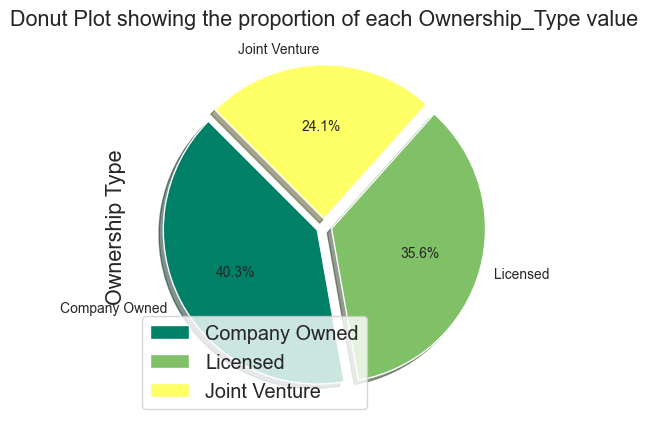

In [39]:
df_merge['Ownership_Type'].value_counts().plot(kind='pie', explode=[0.05, 0.05,0.05], fontsize=10, autopct= '%3.1f%%',
                                               figsize=(5,5), shadow= True, startangle=135, legend= True, cmap='summer')

plt.ylabel('Ownership Type')
plt.title('Donut Plot showing the proportion of each Ownership_Type value')

- **40%** of the outlets are **company owned** and **35%** are **Licensed** outlets.


- Around **24%** of the outlets are on **Joint venture**. This is mostly in countries where 100% FDI is/was not allowed to start their own outlets.

<a id=section50102></a>
### 5.1.2 Which outlets generate maximum revenue for the company?

In [40]:
df_merge.loc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :][['Store_Name', 'State','Country', 'Revenue']]

,Store_Name,State,Country,Revenue
139,19th & Telephone,OK,US,49.68
133,Fort Sill BX,OK,US,49.42
120,Target Cleveland South T-2228,OH,US,49.04
210,Super Target Tuscaloosa ST-1787,AL,US,48.91
103,Target Gateway T-1401,NY,US,48.78
338,Target Fountain Hills T-1432,AZ,US,48.74
258,JFK & McCain,AR,US,48.69
302,SR 135 & Faith,IN,US,48.57
291,Champaign - 5th & Green,IL,US,48.42
105,Elmwood Avenue,NY,US,48.29


In [110]:
# Using Latitude and Longitude values to point the Store Locations on World Map.
data = [go.Scattergeo(lon = df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :]['Longitude'],
                     lat= df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :]['Latitude'],
                     text = df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :][['Store_Name','State','Revenue']],
                     name='',
                     marker = dict(size= df_merge.iloc[df_merge['Revenue'].sort_values(ascending=False)[:10].index, :]['Revenue']/2,
                                   color='Red'))]

In [111]:
layout= go.Layout(title = go.layout.Title(text='Top 10 outlets in terms of Revenue ( in million INR)'),
                  showlegend=False, 
                  geo= dict( projection=go.layout.geo.Projection(type='albers usa'), showlakes= True, 
                            lakecolor='rgb(255, 255, 255)'))

In [112]:
fig = go.Figure(data=data, layout=layout)

In [113]:
iplot(fig)

- All the stores in our **Top 10** for **maximum revenue generation** lie in the **US**.


- The **size** of the **marker** gives the **Revenue** of the outlet, and it can be seen that all the outlets in the **Top 10** have very **similar revenue** (near about **48 - 49 million INR**). 


- The **tooltip** shows the **geographical coordinates, name** , **state**, and **revenue** of the **outlet**.

<a id=section50103></a>
### 5.1.3 Top 10 Outlets in terms of Profit

In [63]:
df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, : ]

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
316,76725-102051,Target Kansas City T-2222,Licensed,10900 Stadium Pkwy,Kansas City,KS,US,-94.83,39.13,46.93,13.51,15.33,20.11,-4.79,141,23842,Strawberry Banana Smoothie (Medium),Smoothies & Shakes,453,250,4,1.0,0.0,0.0,5,58,54,3,60
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,1901 13th Ave E,Tuscaloosa,AL,US,-87.51,33.20,48.91,13.43,17.40,20.96,-3.56,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125
208,72121-3608,U of AL - Ferguson Cntr,Licensed,"1000 McCorvey Dr., UoA-Ferguson Center",Tuscaloosa,AL,US,-87.55,33.21,44.14,12.74,14.33,18.92,-4.58,133,23919,Sprite (Large),Cold Beverages,850,280,0,0.0,0.0,0.0,0,74,74,0,60
220,21772-214865,2001 L St,Company Owned,2001 L St NW,Washington,DC,US,-77.05,38.90,46.25,12.73,16.39,19.82,-3.43,139,22628,Iced Tea (Child),Hot Beverages,340,0,0,0.0,0.0,0.0,0,0,0,0,5
291,9706-96992,Champaign - 5th & Green,Company Owned,503 E. Green Street,Champaign,IL,US,-88.23,40.11,48.42,12.54,18.91,20.75,-1.85,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125
120,76740-99373,Target Cleveland South T-2228,Licensed,3465 Steelyard Dr,Cleveland,OH,US,-81.69,41.46,49.04,12.42,19.76,21.02,-1.26,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370
322,6314-6908,Magazine & Washington,Company Owned,2801 Magazine Street,New Orleans,LA,US,-90.08,29.93,44.15,12.33,15.26,18.92,-3.66,133,23005,Vanilla Shake (Medium),Smoothies & Shakes,453,660,14,19.0,12.0,1.0,75,109,81,0,200
299,2659-66300,State Rd 135 & Stonegate,Company Owned,"1011 N. State Rd 135, Greenwood Park",Greenwood,IN,US,-86.16,39.63,46.58,12.33,17.60,19.96,-2.36,140,21599,Iced Caramel Mocha (Large),Hot Beverages,623,460,13,16.0,10.0,0.5,50,65,59,1,250
175,25202-201748,Kroger Southwest Store #572,Licensed,3400 FM 407 E,Bartonville,TX,US,-97.13,33.08,41.79,12.14,13.40,17.91,-4.51,126,24101,Ranch Snack Wrap (Grilled Chicken),Snacks & Sides,121,280,16,13.0,4.5,0.0,45,25,2,1,720
138,76482-98011,Target Midwest City T-2061,Licensed,7305 SE 29th St,Midwest City,OK,US,-97.40,35.44,44.35,12.12,15.92,19.01,-3.09,133,22431,Premium Crispy Chicken Classic Sandwich,Chicken & Fish,213,510,24,22.0,3.5,0.0,45,55,10,3,990


In [119]:
# Using Latitude and Longitude values to point the Store Locations on World Map.
data = [go.Scattergeo(lon = df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, : ]['Longitude'],
                     lat= df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, : ]['Latitude'],
                     text = df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, : ][['Store_Name','State','Profits']],
                     name='',
                     marker = dict(size= df_merge.iloc[df_merge['Profits'].sort_values(ascending=False)[:10].index, : ]['Profits']*2,
                                   color='Indigo'))]

In [116]:
layout= go.Layout(title = go.layout.Title(text='Top 10 outlets in terms of Profit ( in million INR)'),
                  showlegend=False, 
                  geo= dict( projection=go.layout.geo.Projection(type='albers usa'), showlakes= True, 
                            lakecolor='rgb(255, 255, 255)'))

In [120]:
fig = go.Figure(data=data, layout=layout)

In [121]:
iplot(fig)

- All the stores in our **Top 10** for **maximum profits** also lie in the **US**.


- The **size** of the **marker** gives the **Profit** of the outlet.


- The **tooltip** shows the **geographical coordinates, name** and **profits** of the **outlet**.

<a id=section50104></a>
### 5.1.4 Outlets with highest Number of Employees

In [74]:
df_merge.iloc[df_merge['Number_of_Employees'].sort_values(ascending=False)[:10].index, : ]

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
139,10753-102015,19th & Telephone,Company Owned,620 SW 19th Street,Moore,OK,US,-97.50,35.32,49.68,4.07,38.75,21.29,17.46,149,4056,Premium Grilled Chicken Classic Sandwich,Chicken & Fish,200,350,28,9.0,2.0,0.0,65,42,8,3,820
133,27316-246764,Fort Sill BX,Licensed,1718 Macomb Rd,Fort Sill,OK,US,-98.40,34.67,49.42,5.62,35.08,21.18,13.90,148,7112,McDouble,Beef & Pork,147,380,22,17.0,8.0,1.0,75,34,7,2,840
120,76740-99373,Target Cleveland South T-2228,Licensed,3465 Steelyard Dr,Cleveland,OH,US,-81.69,41.46,49.04,12.42,19.76,21.02,-1.26,147,20506,Cinnamon Melts,Breakfast,114,460,6,19.0,9.0,0.0,15,66,32,3,370
258,9813-97844,JFK & McCain,Company Owned,4824 JFK,North LIttle Rock,AR,US,-92.25,34.80,48.69,8.02,29.10,20.87,8.23,146,12015,Mocha (Small),Hot Beverages,340,340,10,11.0,7.0,0.0,35,49,42,2,150
338,20344-204610,Target Fountain Hills T-1432,Licensed,16825 E. Shea Boulevard,Fountain Hills,AZ,US,-111.72,33.57,48.74,7.05,31.28,20.89,10.39,146,10091,McFlurry with Reese's Peanut Butter Cups (Medium),Smoothies & Shakes,403,810,21,32.0,15.0,1.0,60,114,103,2,400
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,1901 13th Ave E,Tuscaloosa,AL,US,-87.51,33.20,48.91,13.43,17.40,20.96,-3.56,146,22564,1% Low Fat Milk Jug,Cold Beverages,236,100,8,2.5,1.5,0.0,10,12,12,0,125
103,15847-160724,Target Gateway T-1401,Licensed,519 Gateway Dr,Brooklyn,NY,US,-73.87,40.65,48.78,5.76,34.15,20.91,13.24,146,7545,Sausage McGriddles,Breakfast,141,420,11,22.0,8.0,0.0,35,44,15,2,1030
291,9706-96992,Champaign - 5th & Green,Company Owned,503 E. Green Street,Champaign,IL,US,-88.23,40.11,48.42,12.54,18.91,20.75,-1.85,145,21052,Iced Mocha (Small),Hot Beverages,340,290,8,11.0,7.0,0.0,35,41,34,1,125
105,7381-1628,Elmwood Avenue,Company Owned,933 Elmwood Avenue,Buffalo,NY,US,-78.88,42.92,48.29,8.19,28.35,20.70,7.66,145,12471,"Sausage, Egg & Cheese McGriddles with Egg Whites",Breakfast,205,500,21,26.0,10.0,0.0,50,46,15,2,1320
167,70334-135770,Tennessee Tech University,Licensed,1000 North Dixie,Cookeville,TN,US,-85.50,36.17,48.28,6.95,31.05,20.69,10.36,145,10025,Premium Southwest Salad (without Chicken),Salads,230,140,6,4.5,2.0,0.0,10,20,6,6,150


In [128]:
# Using Latitude and Longitude values to point the Store Locations on World Map.
data = [go.Scattergeo(lon = df_merge.iloc[df_merge['Number_of_Employees'].sort_values(ascending=False)[:10].index, : ]['Longitude'],
                     lat= df_merge.iloc[df_merge['Number_of_Employees'].sort_values(ascending=False)[:10].index, : ]['Latitude'],
                     text = df_merge.iloc[df_merge['Number_of_Employees'].sort_values(ascending=False)[:10].index, : ][['Store_Name','State','Number_of_Employees']],
                     name='',
                     marker = dict(size= df_merge.iloc[df_merge['Number_of_Employees'].sort_values(ascending=False)[:10].index, : ]['Number_of_Employees']/5,
                                   color='Blue'))]

In [131]:
layout= go.Layout(title = go.layout.Title(text='Top 10 outlets in terms of Number Of Employees'),
                  showlegend=False, 
                  geo= dict( projection=go.layout.geo.Projection(type='albers usa'), showlakes= True, 
                            lakecolor='rgb(255, 255, 255)'))

In [132]:
fig = go.Figure(data=data, layout=layout)

In [133]:
iplot(fig)

- All the stores in our **Top 10** for **highest number of employees** lie in the **US** as well.


- The **number of employees** in the **top 10** lie in the **range** between **145-149**.


- The **tooltip** shows the **geographical coordinates, name** and **number of employees** of the **outlet**.

<a id=section50105></a>
### 5.1.5 Where do you find the maximum footfall in McDonald's?

In [134]:
df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, : ]

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
281,3236-251306,Hwy 44 and Edgewood - Eagle,Company Owned,1598 E. Riverside Dr.,Eagle,ID,US,-116.33,43.69,38.21,11.45,11.49,16.38,-4.88,116,24964,Caramel Iced Coffee (Large),Hot Beverages,907,260,2,9.0,6.0,0.0,35,43,42,0,65
57,19530-197407,Bandra East - FIFC,Joint Venture,"First International Financial Centre, Bandra Kurla Complex Road, Bandra (East)",Mumbai,MH,IN,72.87,19.07,9.92,2.95,3.03,4.25,-1.23,99,24781,McFloat Fanta,Desserts,237,152,2,2.0,1.1,0.1,3,32,31,0,390
51,20457-205766,Thane West - Korum Mall,Joint Venture,"Upper Ground Level, Korum Mall, Off Eastern Express highway",Mumbai,MH,IN,72.97,19.20,9.85,2.91,3.05,4.22,-1.18,98,24599,Kinley Water,Cold Beverages,500,0,0,0.0,0.0,0.0,0,0,0,0,0
275,73744-103865,Hy-Vee - Bettendorf #1,Licensed,2900 Devils Glen Rd,Bettendorf,IA,US,-90.48,41.55,23.80,7.01,7.43,10.20,-2.77,75,24465,Hot Chocolate with Nonfat Milk (Large),Hot Beverages,566,400,19,3.5,2.5,0.0,20,74,69,1,280
38,21743-215051,Church Street,Joint Venture,"Ground Floor, Prestige RR Building, 55 and 51/1 Church Street",Bangalore,MH,IN,77.61,12.97,9.75,2.86,3.07,4.18,-1.11,97,24344,Regular Coca-Cola,Cold Beverages,249,110,0,0.0,0.0,0.0,0,27,27,0,40
128,76916-131305,Target Wasilla T-2339,Licensed,1801 E Parks Hwy,Wasilla,AK,US,-149.41,61.58,40.71,11.90,12.91,17.45,-4.54,123,24250,Double Quarter Pounder with Cheese,Beef & Pork,283,750,48,43.0,19.0,2.5,160,42,10,3,1280
327,18029-182674,Kroger Shreveport # 539,Licensed,6652 Youree Dr,Shreveport,LA,US,-93.72,32.45,21.97,6.41,6.99,9.42,-2.42,69,24205,Chocolate Shake (Small),Smoothies & Shakes,340,560,12,16.0,10.0,1.0,60,91,77,1,240
20,19514-197404,Indira Gandhi Itnl Arpt-T3Gate27,Joint Venture,"Domestic Departure, Near Gate 27, Terminal 3",New Delhi,DL,IN,77.10,28.56,9.69,2.82,3.09,4.15,-1.06,97,24162,Large Fries,Snacks & Sides,220,685,10,35.0,16.2,0.2,0,82,1,9,520
255,11709-104595,Maumelle & Audubon,Company Owned,105 Commons Drive,Maumelle,AR,US,-92.40,34.85,33.98,9.89,10.87,14.56,-3.70,104,24139,Nonfat Latte with Sugar Free French Vanilla Syrup (Small),Hot Beverages,340,140,10,0.0,0.0,0.0,5,24,13,1,150
175,25202-201748,Kroger Southwest Store #572,Licensed,3400 FM 407 E,Bartonville,TX,US,-97.13,33.08,41.79,12.14,13.40,17.91,-4.51,126,24101,Ranch Snack Wrap (Grilled Chicken),Snacks & Sides,121,280,16,13.0,4.5,0.0,45,25,2,1,720


In [106]:
# Using Latitude and Longitude values to point the Store Locations on World Map.
data = [go.Scattergeo(lon = df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, : ]['Longitude'],
                     lat= df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, : ]['Latitude'],
                     text = df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, : ][['Store_Name','State','Customers']],
                     name='',
                     marker = dict(size= df_merge.iloc[df_merge['Customers'].sort_values(ascending=False)[:10].index, : ]['Customers']/1000,
                                   color='Blue'))]

In [107]:
layout= go.Layout(title = go.layout.Title(text='Top 10 outlets in terms of Number Of Customers'),
                  showlegend=False, 
                  geo= go.layout.Geo(scope='world', landcolor="rgb(229,229,229)", countrycolor="white", coastlinecolor="white", showcoastlines=True))

In [108]:
fig = go.Figure(data=data, layout=layout)

In [109]:
iplot(fig)

- In case of the **Customer count, 6 outlets** are from the **US** and **4** are from **India** in our **Top 10** outlets with **highest number of customers**.


- The **tooltip** shows the **geographical coordinates, name** and **number of customers** of the **outlet**.

<a id=section502></a>
## 5.2 Analysis Based on Nutritional Value

<a id=section50201></a>
### 5.2.1 Which is the most common category on menu?

In [ ]:
# plt.figure(figsize = (15,6))
df_merge.groupby('Category')['Category'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')                                                             

#<a id=section50202></a>
### 5.2.2 Which is the most common category on menu categorized by country?

Text(0, 0.5, 'Count')

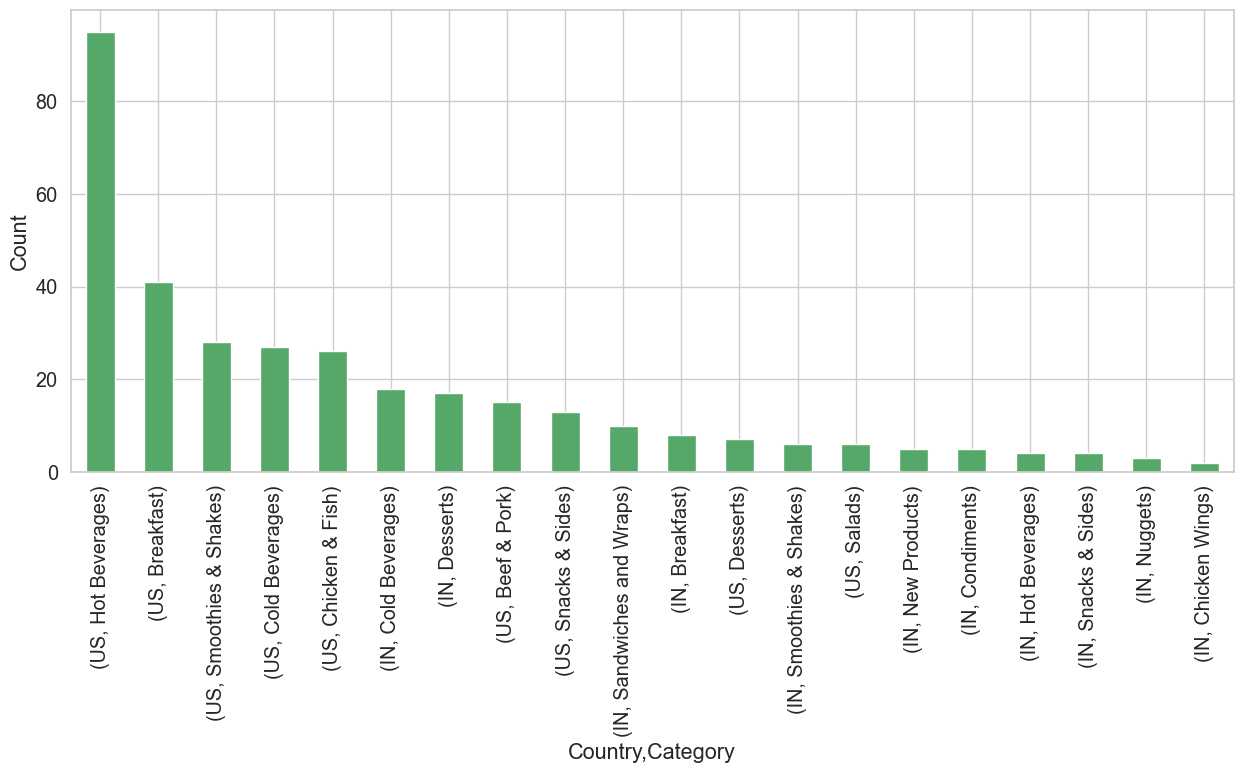

In [150]:
plt.figure(figsize = (15,6))
df_merge.groupby(['Country','Category'])['Category'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')                                                             

- Most items on the **McDonald's menu** belong to the **Hot Beverages** category.

<a id=section50202></a>
### 5.2.2 How many calories (energy) on an average are present in each category of McDonald's menu?

Text(0.5, 0, 'Calories')

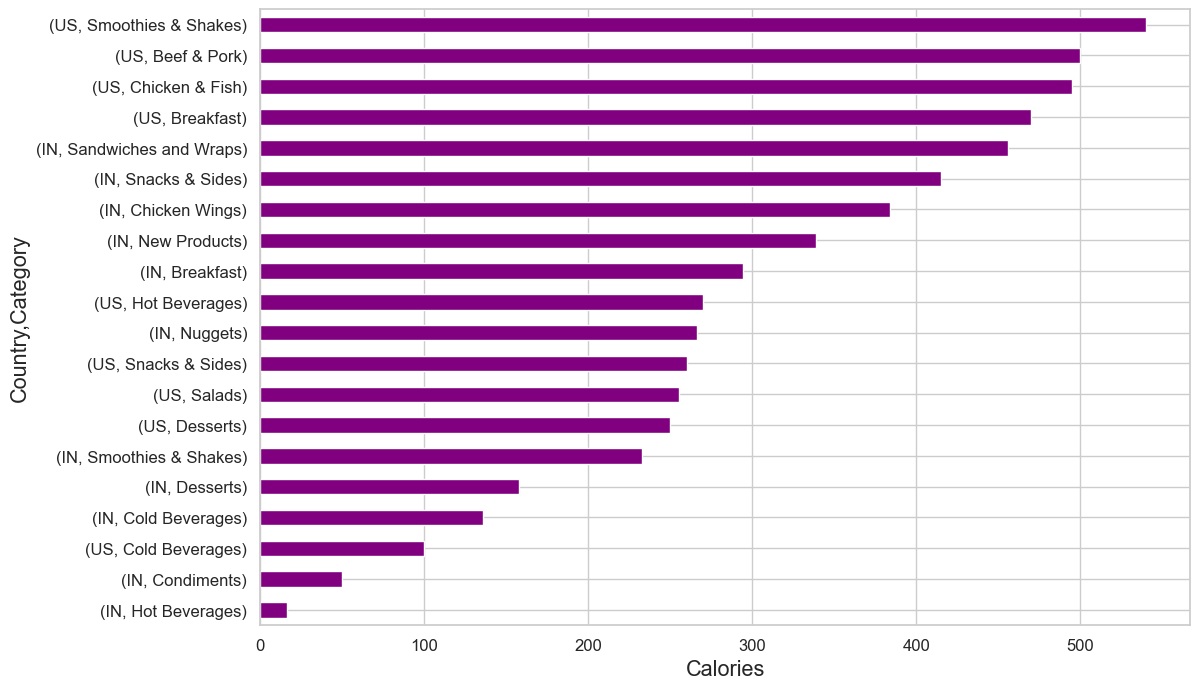

In [156]:
df_merge.groupby(['Country','Category'])['Energy'].median().sort_values().plot(kind='barh', figsize=(12,8), fontsize=12, color='purple')
plt.xlabel('Calories')

- **Chicken & Fish** category has the **highest calory content** present in them followed by **Sandwiches and Wraps**.


- The **most common category** of **Hot Beverages** have **lesser calory content** than the above mentioned categories.

<a id=section50203></a>
### 5.2.3 Is there any difference in the nutritional value of a grilled vs crispy chicken?

In [157]:
#Feature Engineering
df_merge['Grilled'] = df_merge['Best_Selling_Item'].str.contains('Grilled')
df_merge['Grilled'].value_counts()

False    327
True      13
Name: Grilled, dtype: int64

In [211]:
crispy_df = df_merge.loc[df_merge['Best_Selling_Item'].str.contains('Crispy')]
crispy_df.head(2)

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled
138,76482-98011,Target Midwest City T-2061,Licensed,7305 SE 29th St,Midwest City,OK,US,-97.40,35.44,44.35,12.12,15.92,19.01,-3.09,133,22431,Premium Crispy Chicken Classic Sandwich,Chicken & Fish,213,510,24,22.0,3.5,0.0,45,55,10,3,990,False
140,458-1344,Timberhill,Company Owned,2305 NW Kings Blvd,Corvallis,OR,US,-123.28,44.59,29.56,8.12,10.51,12.67,-2.16,91,22583,Premium Crispy Chicken Club Sandwich,Chicken & Fish,249,670,36,33.0,9.0,0.0,85,58,11,3,1410,False


In [212]:
grilled_df = df_merge.loc[df_merge['Best_Selling_Item'].str.contains('Grilled')]
grilled_df.head(2)

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled
139,10753-102015,19th & Telephone,Company Owned,620 SW 19th Street,Moore,OK,US,-97.50,35.32,49.68,4.07,38.75,21.29,17.46,149,4056,Premium Grilled Chicken Classic Sandwich,Chicken & Fish,200,350,28,9.0,2.0,0.0,65,42,8,3,820,True
141,3415-86784,9th & Garfield - Corvallis,Company Owned,"1705 NW 9th Street, Suite B",Corvallis,OR,US,-123.26,44.58,38.11,8.17,18.60,16.33,2.27,116,16786,Premium Grilled Chicken Club Sandwich,Chicken & Fish,235,510,40,20.0,7.0,0.0,105,44,9,3,1250,True


In [171]:
crispy_df[['Best_Selling_Item','Total_Fat']]

,Best_Selling_Item,Total_Fat
138,Premium Crispy Chicken Classic Sandwich,22.0
140,Premium Crispy Chicken Club Sandwich,33.0
142,Premium Crispy Chicken Ranch BLT Sandwich,28.0
144,Bacon Clubhouse Crispy Chicken Sandwich,38.0
146,Southern Style Crispy Chicken Sandwich,19.0
150,Premium McWrap Chicken & Bacon (Crispy Chicken),32.0
152,Premium McWrap Chicken & Ranch (Crispy Chicken),31.0
154,Premium McWrap Southwest Chicken (Crispy Chicken),33.0
156,Premium McWrap Chicken Sweet Chili (Crispy Chicken),23.0
165,Premium Bacon Ranch Salad with Crispy Chicken,21.0


In [172]:
grilled_df[['Best_Selling_Item','Total_Fat']]

,Best_Selling_Item,Total_Fat
139,Premium Grilled Chicken Classic Sandwich,9.0
141,Premium Grilled Chicken Club Sandwich,20.0
143,Premium Grilled Chicken Ranch BLT Sandwich,15.0
145,Bacon Clubhouse Grilled Chicken Sandwich,25.0
151,Premium McWrap Chicken & Bacon (Grilled Chicken),19.0
153,Premium McWrap Chicken & Ranch (Grilled Chicken),18.0
155,Premium McWrap Southwest Chicken (Grilled Chicken),20.0
157,Premium McWrap Chicken Sweet Chili (Grilled Chicken),10.0
166,Premium Bacon Ranch Salad with Grilled Chicken,8.0
169,Premium Southwest Salad with Grilled Chicken,8.0


In [213]:
crispy_df.drop(146, inplace=True )


In [194]:
crispy_df

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Longitude,Latitude,Revenue,Profits,Selling_Price,Cost_Price,Gross_Profit_Margin,Number_of_Employees,Customers,Best_Selling_Item,Category,Serve_Size,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium,Grilled
138,76482-98011,Target Midwest City T-2061,Licensed,7305 SE 29th St,Midwest City,OK,US,-97.40,35.44,44.35,12.12,15.92,19.01,-3.09,133,22431,Premium Crispy Chicken Classic Sandwich,Chicken & Fish,213,510,24,22.0,3.5,0.0,45,55,10,3,990,False
140,458-1344,Timberhill,Company Owned,2305 NW Kings Blvd,Corvallis,OR,US,-123.28,44.59,29.56,8.12,10.51,12.67,-2.16,91,22583,Premium Crispy Chicken Club Sandwich,Chicken & Fish,249,670,36,33.0,9.0,0.0,85,58,11,3,1410,False
142,79547-104100,Safeway - Cottage Grove #1458,Licensed,1500 E Main Street,Cottage Grove,OR,US,-123.05,43.80,28.03,2.53,21.34,12.01,9.33,87,4862,Premium Crispy Chicken Ranch BLT Sandwich,Chicken & Fish,230,610,32,28.0,6.0,0.0,70,57,11,3,1400,False
144,74778-98723,Safeway - Dallas -#4404,Licensed,138 W Ellendale Ave,Dallas,OR,US,-123.31,44.93,46.19,6.86,29.24,19.80,9.45,139,10465,Bacon Clubhouse Crispy Chicken Sandwich,Chicken & Fish,284,750,36,38.0,10.0,0.5,90,65,16,4,1720,False
150,7887-72865,Sixth Street,Company Owned,"202 Sixth Street, Lafayette Plaza",Pittsburgh,PA,US,-80.00,40.44,19.54,2.00,14.36,8.37,5.98,62,6028,Premium McWrap Chicken & Bacon (Crispy Chicken),Chicken & Fish,316,630,32,32.0,9.0,0.5,80,56,7,3,1540,False
152,17198-172190,Cumberland Valley Travel Plaza,Licensed,Pennsylvania Turnpike MP 219.12,Plainfield,PA,US,-77.28,40.21,21.44,6.08,7.21,9.19,-1.98,68,23422,Premium McWrap Chicken & Ranch (Crispy Chicken),Chicken & Fish,310,610,27,31.0,8.0,0.5,65,56,8,3,1340,False
154,24455-93327,Giant-Plymouth Meeting #11,Licensed,2450 Chemical Rd,Plymouth Meeting,PA,US,-75.29,40.10,34.81,9.09,13.41,14.92,-1.50,106,21276,Premium McWrap Southwest Chicken (Crispy Chicken),Chicken & Fish,314,670,27,33.0,8.0,0.5,60,68,12,5,1480,False
156,14221-107001,Philadelphia Premium Outlets,Company Owned,"18 Lightcap Road, 1039, Trainers Corner Shopping Center",Pottstown,PA,US,-75.57,40.24,41.09,3.20,32.40,17.61,14.79,124,3684,Premium McWrap Chicken Sweet Chili (Crispy Chicken),Chicken & Fish,304,540,23,23.0,4.5,0.0,50,61,14,3,1260,False
165,25983-237524,Kroger Columbia #507,Licensed,1202 S James Campbell Blvd,Columbia,TN,US,-87.06,35.60,28.38,6.79,12.30,12.16,0.13,88,19183,Premium Bacon Ranch Salad with Crispy Chicken,Salads,255,380,25,21.0,6.0,0.0,70,22,5,2,860,False
168,10791-102282,Houston Levee & Macon,Company Owned,1181 North Houston Levee,Cordova,TN,US,-89.73,35.16,45.08,5.63,30.89,19.32,11.57,135,8189,Premium Southwest Salad with Crispy Chicken,Salads,348,450,23,22.0,4.5,0.0,50,42,12,7,850,False


In [214]:
# Merge both the crispy and grilled DataFrame to perform  better analysis
df1 = grilled_df[['Best_Selling_Item','Total_Fat']].reset_index(drop= True).merge(crispy_df[['Best_Selling_Item','Total_Fat']].reset_index(drop=True), left_index=True, right_index= True )
df1.columns = ['Items-Grilled', 'Total_Fat-Grilled', 'Items-Crispy','Total_Fat-Crispy']
df1.head(2)

,Items-Grilled,Total_Fat-Grilled,Items-Crispy,Total_Fat-Crispy
0,Premium Grilled Chicken Classic Sandwich,9.0,Premium Crispy Chicken Classic Sandwich,22.0
1,Premium Grilled Chicken Club Sandwich,20.0,Premium Crispy Chicken Club Sandwich,33.0


In [215]:
df1.drop('Items-Crispy', axis=1, inplace=True)
df1['Item'] = df1['Items-Grilled'].str.replace("Grilled","")
df1.drop('Items-Grilled', axis=1, inplace=True)
df1.index= df1.Item



In [216]:
df1.head()

,Total_Fat-Grilled,Total_Fat-Crispy,Item
Item,,,
Premium Chicken Classic Sandwich,9.0,22.0,Premium Chicken Classic Sandwich
Premium Chicken Club Sandwich,20.0,33.0,Premium Chicken Club Sandwich
Premium Chicken Ranch BLT Sandwich,15.0,28.0,Premium Chicken Ranch BLT Sandwich
Bacon Clubhouse Chicken Sandwich,25.0,38.0,Bacon Clubhouse Chicken Sandwich
Premium McWrap Chicken & Bacon ( Chicken),19.0,32.0,Premium McWrap Chicken & Bacon ( Chicken)


Text(0.5, 0, 'Total Fat')

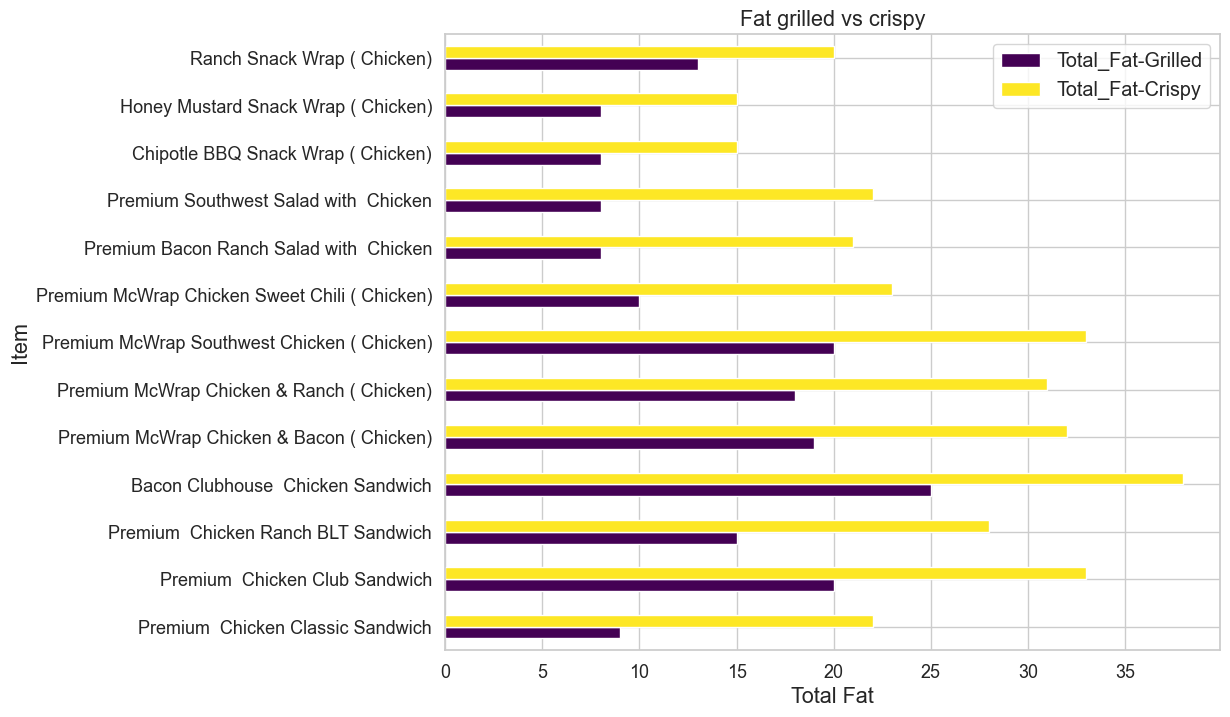

In [218]:
df1[['Total_Fat-Grilled','Total_Fat-Crispy', 'Item']].plot(kind='barh', title='Fat grilled vs crispy', fontsize=13,
                                                          cmap='viridis', figsize=(10,8))
plt.xlabel('Total Fat')

- It is evident form the chart that **Crispy** food items have **higher fat content** present as compared to **Grilled** food items.


- These items (Chicken and Sandwiches) already have a **high calory content** as shown in the previous chart, now we can distinguish them on the basis of **Fat content** as well.

<a id=section50204></a>
### 5.2.4 On an average, how much sugar consumption happens when you order Desserts, Beverages, Smoothies and Shakes?

Text(0, 0.5, 'Sugar Content')

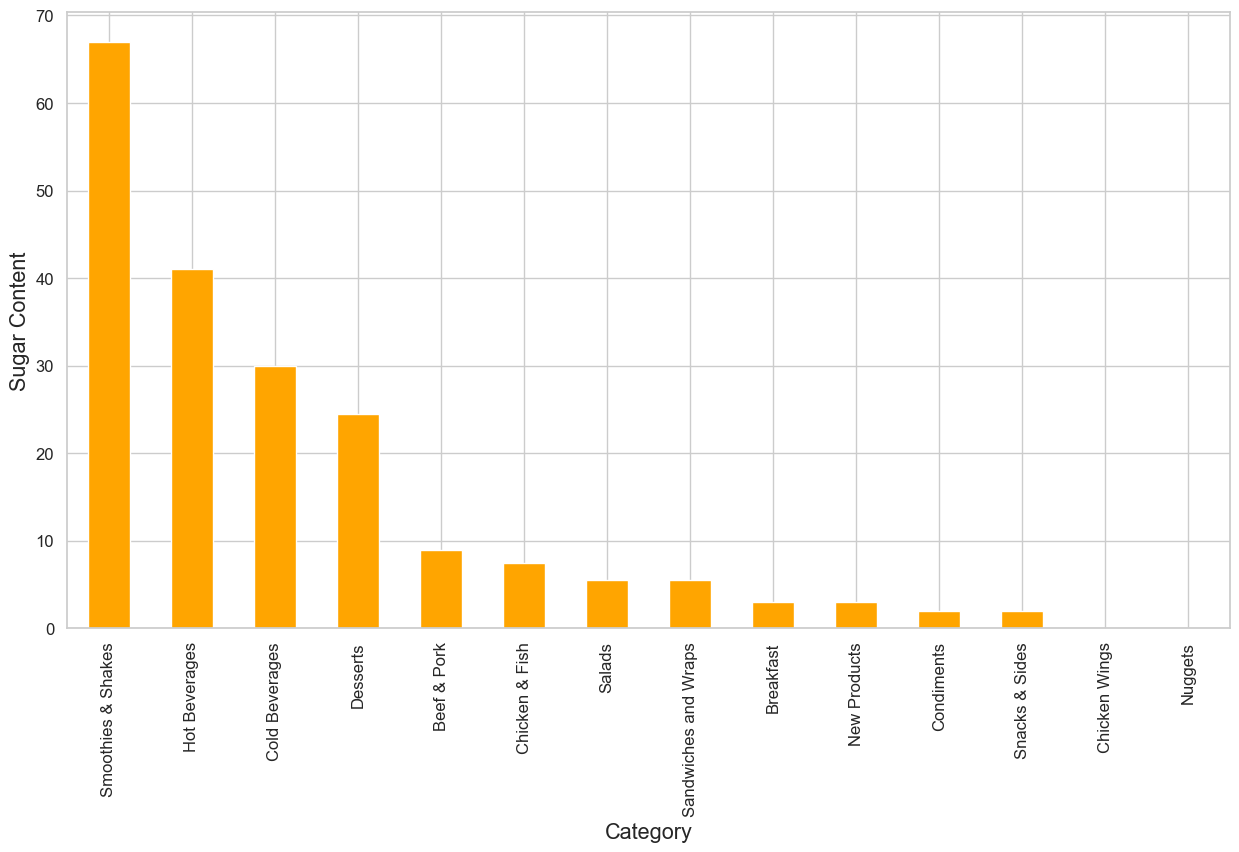

In [229]:
df_merge.groupby('Category')['Sugars'].median().sort_values(ascending=False).plot(kind='bar', figsize=(15,8), fontsize=12, color='orange')
plt.ylabel('Sugar Content')

In [227]:
df_merge[df_merge['Category'] == 'Smoothies & Shakes']['Sugars'].median()

67.0

- The **Sugar** content present in the **Desserts, Beverages, Smoothies and Shakes** categories is **more than twice** the **sugar** content present in the remaining categories.


- The **most common category** on the menu **Hot Beverages** is only behind **Smoothies and Shakes** in terms of **Sugar content** present in them.


- Take a **cautious approach** with the intake of the items belonging to these categories because **too much sugar intake** has a lot of **side effects**.

<a id=section6></a>
## 6. Conclusion

- It is analyzed that the items in menu dataset can be categorized as **nutritious** food and **non-nutritious** food based on different chart diagrams and range values in percentage obtained. 


- So it is beneficial for demonstrating different range values for food nutrients such as **Protein, Sugar, Dietary Fibers, Fats, Carbohydrates, Cholesterol, and Sodium** for their proper consumption from menu items.


- The US food industry has risen as a high-development and high-benefit area because of its huge potential for esteem expansion, especially inside the food processing industry.


- However, India is still taking its initial steps and this could be the reason for McDonald's India not being profitable after many years of operations. 

<a id=section601></a>
### 6.1 Actionable Insights

- In order to **increase** the **outlet metrics** like **Revenue, Profits** in **Indian outlets**, **McDonald's** need to **open new outlets** belonging to the **Company Owned** and **Licensed** ownership types **instead of Joint Ventures**.


- The **nutritional content** of the food items can be **improved** if **good agricultural practices** are taken up in **India** like use of **Genetically Modified Crops (GM Crops)**, **High-Yield-Variety (HYV) seeds**, etc.


- **McDonald's India** needs to **introduce more food items** on the menu, which have **higher nutritional content** like US and will eventually help them **increase** their **revenue and profits**.